In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report,accuracy_score, mean_squared_error,mean_absolute_percentage_error,r2_score

In [2]:
data = yf.download('HSI','2018-01-01','2022-01-01')
data['Prediction']=data['Close'].shift(-1)
data.dropna(inplace=True)
data_val=data[-100:]
data=data[:-100]

[*********************100%***********************]  1 of 1 completed


In [3]:
rf = make_pipeline(MinMaxScaler(feature_range(-1,1))RandomForestRegressor())

In [4]:
X=data.drop(['Volume','Prediction'],1).values
Y=data['Prediction'].values

/var/folders/8h/w0jn89bj2w5g85gj4ck7w0t00000gn/T/ipykernel_74524/2291348358.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=data.drop(['Volume','Prediction'],1).values


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,shuffle=False)

In [6]:
svm.fit(
    X_train,
    y_train)

Pipeline(steps=[('svr', SVR(C=50))])

In [7]:
# The best possible score is 1.0
svm_confidence = svm.score(X_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  -6.625485971314126


In [8]:
y_pred=svm.predict(X_test)

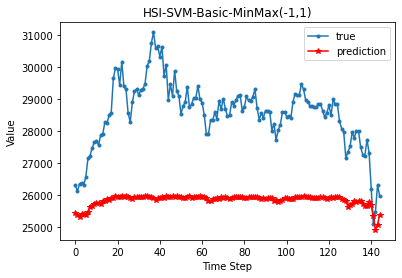

In [9]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r',marker='*', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.title('HSI-SVM-Basic-MinMax(-1,1)')
plt.legend()

In [10]:
mean_squared_error(y_test,y_pred,squared=False)

2851.07196274033

In [11]:
mean_absolute_percentage_error(y_test,y_pred)

0.09390126171340081

In [12]:
r2_score(y_test,y_pred)

-6.625485971314126